<a href="https://colab.research.google.com/github/blankHell/Data-Mining---2021/blob/main/Assignment_1_Data_Mining_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necesary Libraries
import time
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# Transforming the PIL Images from torchvision to tensors

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


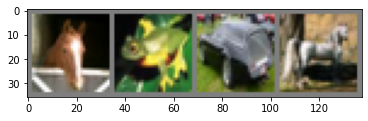

horse  frog   car horse


In [3]:
# Viewing the data we have loaded

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [4]:
# Creating two lists : One for storing the training times of model and the other to store the accuracies of the model.

accuracies = []
train_times = []

In [5]:
# Defining a convolutional neural network

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
# Defining an optimizer and a loss function

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
# Training the network

start_time = time.time()

for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
train_time1 = time.time() - start_time
train_times.append(train_time1)
print('Finished Training - ', train_time1)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 2.209
[1,  4000] loss: 1.840
[1,  6000] loss: 1.675
[1,  8000] loss: 1.596
[1, 10000] loss: 1.553
[1, 12000] loss: 1.483
[2,  2000] loss: 1.410
[2,  4000] loss: 1.399
[2,  6000] loss: 1.362
[2,  8000] loss: 1.339
[2, 10000] loss: 1.314
[2, 12000] loss: 1.284
[3,  2000] loss: 1.226
[3,  4000] loss: 1.215
[3,  6000] loss: 1.191
[3,  8000] loss: 1.190
[3, 10000] loss: 1.212
[3, 12000] loss: 1.182
Finished Training -  210.05962014198303


In [8]:
# # Saving
# PATH = './cifar_net.pth'
# torch.save(net.state_dict(), PATH)

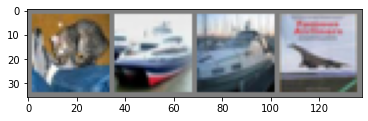

GroundTruth:    cat  ship  ship plane


In [9]:
# Displaying the test data

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
# # Re-loading the model
# net = Net()
# net.load_state_dict(torch.load(PATH))

In [11]:
# Testing to see the performance
outputs = net(images)

In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship plane plane


In [13]:
# Testing the performance on the whole data set

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy1 = 100 * (correct / total)
accuracies.append(accuracy1)
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [14]:
# Increasing the width of the network or changing shape of Conv2d()


import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [15]:
# Re - Defining an optimizer and a loss function

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [16]:
# Re-training the model
start_time = time.time()
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
train_time2 = time.time() - start_time
train_times.append(train_time2)
print('Finished Training - ', train_time2)

[1,  2000] loss: 2.131
[1,  4000] loss: 1.779
[1,  6000] loss: 1.600
[1,  8000] loss: 1.476
[1, 10000] loss: 1.412
[1, 12000] loss: 1.350
[2,  2000] loss: 1.245
[2,  4000] loss: 1.213
[2,  6000] loss: 1.187
[2,  8000] loss: 1.172
[2, 10000] loss: 1.153
[2, 12000] loss: 1.121
[3,  2000] loss: 1.022
[3,  4000] loss: 1.035
[3,  6000] loss: 1.003
[3,  8000] loss: 0.988
[3, 10000] loss: 0.976
[3, 12000] loss: 0.989
[4,  2000] loss: 0.888
[4,  4000] loss: 0.908
[4,  6000] loss: 0.893
[4,  8000] loss: 0.907
[4, 10000] loss: 0.876
[4, 12000] loss: 0.876
Finished Training -  336.8370010852814


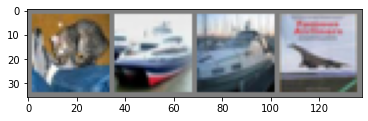

GroundTruth:    cat  ship  ship plane


In [17]:
# Displaying the test data

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [18]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


In [19]:
# Testing the performance on the whole data set after modifications

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy2 = 100 * (correct / total)
accuracies.append(accuracy2)
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 66 %


In [20]:
# Modifying the hyper parameters again

# Defining a convolutional neural network

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, 1, 1)
        self.pool = nn.MaxPool2d(2, 2, 1, 1)
        self.conv2 = nn.Conv2d(6, 16, 5, 1, 1)
        self.conv3 = nn.Conv2d(16, 64, 5, 1, 1)
        self.conv4 = nn.Conv2d(64, 32, 5, 1, 1)
        self.fc1 = nn.Linear(32 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=128, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [22]:
start_time = time.time()
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
train_time3 = time.time() - start_time
train_times.append(train_time3)
print('Finished Training - ', train_time3)

[1,  2000] loss: 2.303
[1,  4000] loss: 2.302
[1,  6000] loss: 2.128
[1,  8000] loss: 1.893
[1, 10000] loss: 1.763
[1, 12000] loss: 1.648
[2,  2000] loss: 1.546
[2,  4000] loss: 1.497
[2,  6000] loss: 1.422
[2,  8000] loss: 1.376
[2, 10000] loss: 1.334
[2, 12000] loss: 1.277
[3,  2000] loss: 1.222
[3,  4000] loss: 1.194
[3,  6000] loss: 1.173
[3,  8000] loss: 1.113
[3, 10000] loss: 1.141
[3, 12000] loss: 1.100
[4,  2000] loss: 1.028
[4,  4000] loss: 1.020
[4,  6000] loss: 1.010
[4,  8000] loss: 0.996
[4, 10000] loss: 1.006
[4, 12000] loss: 0.979
Finished Training -  444.1466784477234


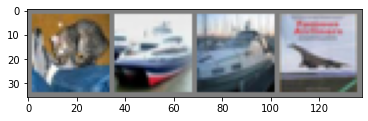

GroundTruth:    cat  ship  ship plane


In [23]:
 dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [24]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat plane plane plane


In [25]:
# Testing the performance on the whole data set after modifications

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy3 = 100 * (correct / total)
accuracies.append(round(accuracy3, 2))
print(f'Accuracy of the network on the 10000 test images: {round(100 * correct / total)}')


Accuracy of the network on the 10000 test images: 65


In [26]:
listAccuracies = []
listTrainTimes = []
for accuracy in accuracies:
  accuracy = round(accuracy, 2)
  listAccuracies.append(accuracy)

for time in train_times:
  time = round(time, 2)
  listTrainTimes.append(time)


In [27]:
print(listAccuracies)

[59.06, 66.52, 64.66]


In [28]:
print(listTrainTimes)

[210.06, 336.84, 444.15]


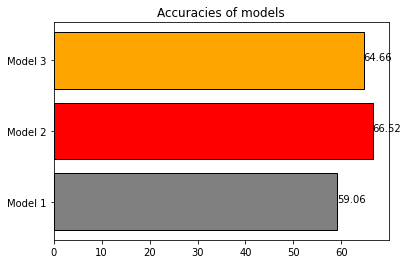

In [29]:
import matplotlib.pyplot as plt
xA = np.arange(len(listAccuracies))
plt.barh(xA, listAccuracies, color = ['grey', 'red', 'orange'] , edgecolor = 'black')
plt.yticks(xA, ['Model 1', 'Model 2', 'Model 3'])
for index, value in enumerate(listAccuracies):
    plt.text(value, index, str(value))
plt.title('Accuracies of models')
plt.show()

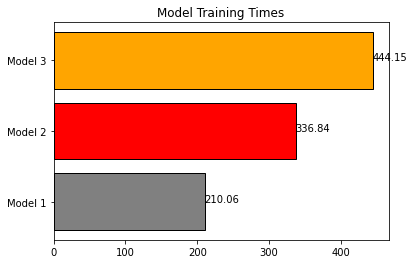

In [30]:
xT = np.arange(len(listTrainTimes))
plt.barh(xT, listTrainTimes, color = ['grey', 'red', 'orange'] , edgecolor = 'black')
plt.yticks(xT, ['Model 1', 'Model 2', 'Model 3'])
for index, value in enumerate(listTrainTimes):
    plt.text(value, index, str(value))
plt.title('Model Training Times')
plt.show()